<a href="https://colab.research.google.com/github/minhducvo04/PyTorch-models/blob/main/PyTorch_Model_For_Linear_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [ ]:
import numpy as np
import torch
from torch import nn #nn contains everything we need for neural network
import pandas as pd
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
device, torch.__version__

('cuda', '1.13.0+cu116')

#Data (preparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheet
* Image of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of 2 parts:
1. Get data into a numberical representation
2. Build a model to learn patterns in that numerical representation

To showcase thism let's create some *known* data using the linear regression formula.
We'll use a linear regression formula to make a straight line with *known* **parameter** -> a patter for ML to learn

(if y = a + bx -> b: weight, a: bias, y: dependant var, x: independant var)

In [ ]:
#Create *known* parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias
X[:20], y[:20], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660]]), 50, 50)

#Splitting data into learning and test sets (one of the most important concepts in machine learning in general)

Let's create training and test set with our data

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?
This is where the data explorer's motto comes in!
"Visualize, visualize, visualize!"

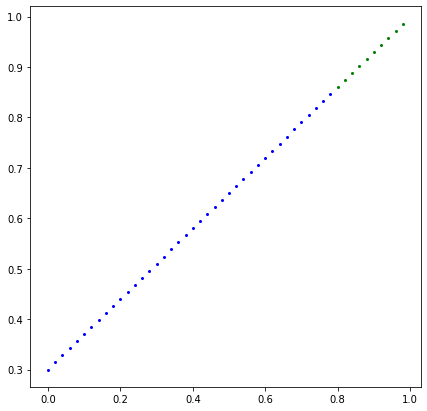

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (7,7))
  #Plt training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4, label = "Training data")
  #Plt test data in yellow
  plt.scatter(test_data,test_labels, c="g",s=4, label = "Testing data")
  #Are there prediction?
  if predictions is not True and predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions")
    #Show the legend
    plt.legend(prop={"size": 14});
plot_predictions();


#Build model
Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) thhe ideal values (the weight & bias values we used to create the data)

Through 2 main algorithms:
* Gradient descend
* Backpropagation

In [ ]:
#Create linear regression model class
class LinearRegressionModel(nn.Module): #Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  #Forward method to defind the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias #this is the linear regression formula

#PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim() - this is where optimizers in PyTorch live, they will help witg gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

#Checking the contents of our PyTorch model

Now we've created the model, let see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]),
 0.7,
 0.3)

#Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
#Make predictions with model (use inference mode so that we can get rid of background data stored on the tensor
#We can use torch.no_grad() but not as prefered)
##CHOOSE
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

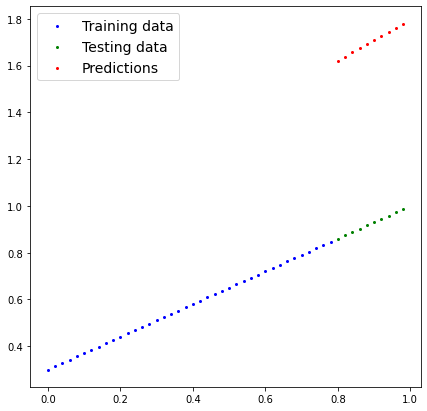

In [ ]:
plot_predictions(predictions=y_preds)

#3. Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some parameters.
Or in other words from a poor representaion of the data to a better representation of the data
One way to measure how poor or how wrong your models predictions are is using lost functions

Things we need to train

**Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

'##CHOOSE'
Choose an appropriate loss function for the models from https://pytorch.org/docs/stable/nn.html#loss-functions (L1 is the mean absolute error, L2 is the mean squared error)

**Optimizer:** Takes to account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss funtion. 

'##CHOOSE'
Choose an appropriate optimizer for the models from https://pytorch.org/docs/stable/optim.html (SGD is the popular gradient descent, Rprop is the resilient backpropagation, nn.BCELoss() >Binary cross entropy loss< is usually for classification problem like classifying whether a photo is a dog or a cot)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a paremeter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.0001) #learning rate = possibly the most important hyperparameters you can set


#Building a training loop (and a testing loop) in PyTorch

A couple of fthings we need in a training lopp:
0. Loop through the data
1. Forward pass (this envolves data moving through our model's `framework()` function to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards throught the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data...
epochs = 10000

# Track different value
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop though the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop
                   #so we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval() #turn off gradient setting in the model not needed for evaluation/ testing (dropout/batch norm layers)
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    y_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(y_pred, y_test)
  if(epoch % 10 == 0):
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
  #if(epoch % 200 == 0):
    #with torch.inference_mode():
    #y_preds_new = model_0(X_test)
      #plot_predictions(predictions = model_0(X_test))
  #print(model_0.state_dict(), weight, bias, loss)


Epoch: 0 | Test: 0.6860889196395874 | Test loss: 0.7770889401435852
Epoch: 100 | Test: 0.6745670437812805 | Test loss: 0.7636178731918335
Epoch: 200 | Test: 0.6630450487136841 | Test loss: 0.7501469254493713
Epoch: 300 | Test: 0.651523232460022 | Test loss: 0.7366758584976196
Epoch: 400 | Test: 0.6400011777877808 | Test loss: 0.7232049107551575
Epoch: 500 | Test: 0.6284793615341187 | Test loss: 0.7097338438034058
Epoch: 600 | Test: 0.6169573068618774 | Test loss: 0.6962628960609436
Epoch: 700 | Test: 0.6054353713989258 | Test loss: 0.6827918291091919
Epoch: 800 | Test: 0.5939134955406189 | Test loss: 0.6693208813667297
Epoch: 900 | Test: 0.5823915004730225 | Test loss: 0.655849814414978
Epoch: 1000 | Test: 0.5708696246147156 | Test loss: 0.6423788666725159
Epoch: 1100 | Test: 0.5593476295471191 | Test loss: 0.6289077997207642
Epoch: 1200 | Test: 0.5478257536888123 | Test loss: 0.615436851978302
Epoch: 1300 | Test: 0.5363038182258606 | Test loss: 0.6019657850265503
Epoch: 1400 | Test: 0

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))]) 0.7 0.3 tensor(8.9806e-05, grad_fn=<MeanBackward0>)


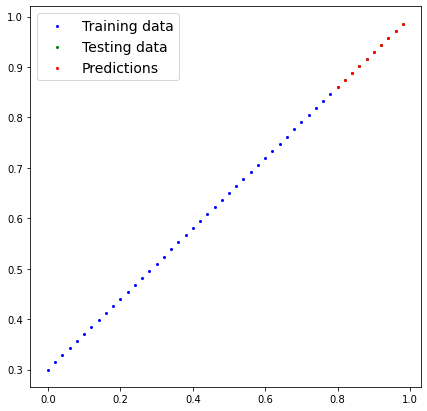

In [ ]:
# Graping and stuff
print(model_0.state_dict(), weight, bias, loss)
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

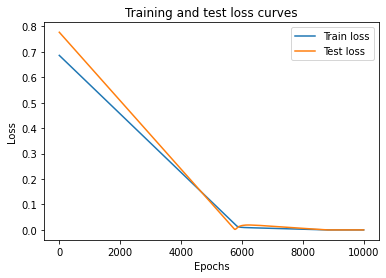

In [ ]:
#Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

# Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.
1. `torch.save()` allows you save a PyTorch object in Python's pickle format
2. `torch.load()` allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` allows you to load a model's saved state dictionary

In [ ]:
# Saving our model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "00_pytorch_MDuc_first_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

# Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])